In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [24]:
def reformat_time(old_time):
    return pd.to_datetime(re.sub(r'\([^)]*\)', '', old_time))

In [25]:
#df1 = pd.read_csv("./SpringTestApp_3Tier_-_CPU_Usage/SpringTestApp_3Tier_-_CPU_Usage_1.csv")
# df2 = pd.read_csv("./SpringTestApp_3Tier_-_CPU_Usage/SpringTestApp_3Tier_-_CPU_Usage_2.csv")
# df3 = pd.read_csv("./SpringTestApp_3Tier_-_CPU_Usage/SpringTestApp_3Tier_-_CPU_Usage_3.csv")

df0 = pd.read_csv("/home/robb/PycharmProjects/locust-flask-test/experiments/data/20240404_exp5min_u2-16/u6/SpringTestApp_3Tier_-_CPU_Usage/SpringTestApp_3Tier_-_CPU_Usage_2.csv", skiprows=1)
df1 = pd.read_csv("/home/robb/PycharmProjects/locust-flask-test/experiments/data/20240404_exp5min_u2-16/u6/SpringTestApp_3Tier_-_RPS/SpringTestApp_3Tier_-_RPS_2.csv", skiprows=1)


df1.columns = ['time', 'RPS']
df0.columns = ['time', 'CPU']
df1['time'] = df1['time'].apply(lambda x: reformat_time(x))
df0['time'] = df0['time'].apply(lambda x: reformat_time(x))



print(df0)

print("Prima del resampling")

print(df1)

df1['time'] = pd.to_datetime(df1['time'])
df1.set_index('time', inplace=True)
df1 = df1.resample('1min').ffill()

print("Dopo il resampling")

print(df1)


                       time       CPU
0 2024-04-04 12:14:00-02:00  0.146548
1 2024-04-04 12:15:00-02:00  0.023017
2 2024-04-04 12:16:00-02:00  0.192012
3 2024-04-04 12:17:00-02:00  0.497175
4 2024-04-04 12:18:00-02:00  0.394026
5 2024-04-04 12:19:00-02:00  0.426634
6 2024-04-04 12:20:00-02:00  0.453477
7 2024-04-04 12:21:00-02:00  0.289510
8 2024-04-04 12:22:00-02:00  0.050453
Prima del resampling
                       time       RPS
0 2024-04-04 12:14:00-02:00  3.872920
1 2024-04-04 12:16:00-02:00  3.994687
2 2024-04-04 12:17:00-02:00  4.794398
3 2024-04-04 12:18:00-02:00  4.130650
4 2024-04-04 12:19:00-02:00  4.536702
5 2024-04-04 12:20:00-02:00  4.524113
6 2024-04-04 12:21:00-02:00  4.596898
Dopo il resampling
                                RPS
time                               
2024-04-04 12:14:00-02:00  3.872920
2024-04-04 12:15:00-02:00  3.872920
2024-04-04 12:16:00-02:00  3.994687
2024-04-04 12:17:00-02:00  4.794398
2024-04-04 12:18:00-02:00  4.130650
2024-04-04 12:19:00-02:0

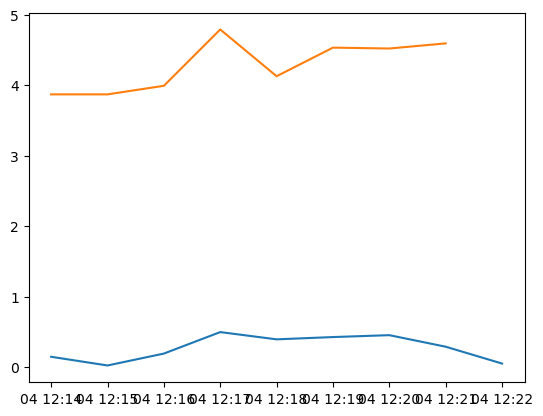

In [44]:
#plt.plot(df1['time'], df1['RPS'], label='DF1')  # Plot data from df1

# plt.plot(df1)


#df0['time'] = pd.to_datetime(df0['time'])
#df0.set_index('time', inplace=True)

plt.plot(df0)

plt.plot(df1)


